In [1]:
!pip install sparqlwrapper

In [2]:
import sys
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# SPARQL Query
query = """
SELECT DISTINCT ?film ?filmLabel ?image WHERE {
  ?film wdt:P31 wd:Q11424;
   wdt:P154 ?image.
  FILTER (!CONTAINS(LCASE(STR(?image)), ".svg"))
  SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 100
"""

def get_results(endpoint_url, query):
    """ Exécute la requête SPARQL et retourne les résultats en JSON """
    try:
        user_agent = "WDQS-example Python/%s.%s" % (
            sys.version_info[0],
            sys.version_info[1],
        )
        sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        return sparql.query().convert()
    except Exception as e:
        print(f"❌ Erreur lors de la requête SPARQL : {e}")
        return None

# Exécuter la requête
results = get_results(endpoint_url, query)

# Stocker les résultats dans un tableau
if results:
    data = []
    for result in results["results"]["bindings"]:
        film = result["film"]["value"] if "film" in result else "N/A"
        label = result["label"]["value"] if "label" in result else "N/A"
        image = result["image"]["value"] if "image" in result else "N/A"
        data.append((film, label, image))


import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?film ?filmLabel ?image WHERE {
  ?film wdt:P31 wd:Q11424;
   wdt:P154 ?image.
  FILTER (!CONTAINS(LCASE(STR(?image)), ".svg"))
  SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 100"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["film"]["value"],
            result["filmLabel"]["value"],
            result["image"]["value"],
        )
    )

In [3]:
dataframe = pd.DataFrame(array, columns=["ville", "pays", "image"])
dataframe = dataframe.astype(
    dtype={"ville": "<U200", "pays": "<U200", "image": "<U200"}
)
dataframe

,ville,pays,image
0,http://www.wikidata.org/entity/Q19866947,Le Cercle : Rings,http://commons.wikimedia.org/wiki/Special:File...
1,http://www.wikidata.org/entity/Q21028668,After Image,http://commons.wikimedia.org/wiki/Special:File...
2,http://www.wikidata.org/entity/Q13534614,Q13534614,http://commons.wikimedia.org/wiki/Special:File...
3,http://www.wikidata.org/entity/Q827105,Delicatessen,http://commons.wikimedia.org/wiki/Special:File...
4,http://www.wikidata.org/entity/Q126183,Working Girl,http://commons.wikimedia.org/wiki/Special:File...
...,...,...,...
95,http://www.wikidata.org/entity/Q1070554,Stuart Little 2,http://commons.wikimedia.org/wiki/Special:File...
96,http://www.wikidata.org/entity/Q846679,Karaté Kid,http://commons.wikimedia.org/wiki/Special:File...
97,http://www.wikidata.org/entity/Q20538737,Q20538737,http://commons.wikimedia.org/wiki/Special:File...
98,http://www.wikidata.org/entity/Q30602709,Jan Žižka,http://commons.wikimedia.org/wiki/Special:File...


In [4]:
import requests
import shutil
import os

def download_image(url, save_path="images"):
    """
    Télécharge une image depuis une URL et l'enregistre dans le dossier spécifié.
    
    :param url: URL de l'image à télécharger
    :param save_path: Dossier où enregistrer l'image (par défaut "images")
    :return: Chemin du fichier téléchargé si succès, None sinon
    """
    headers = {"User-Agent": "Mozilla/5.0"}
    
    # Requête pour récupérer l'image
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)

    if request.status_code == 200:
        # Crée le dossier s'il n'existe pas
        os.makedirs(save_path, exist_ok=True)

        # Récupère le nom de fichier depuis l'URL
        filename = os.path.basename(url)
        file_path = os.path.join(save_path, filename)

        # Sauvegarde l'image
        with open(file_path, "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
        
        print(f"✅ Image téléchargée : {file_path}")
        return file_path  # Retourne le chemin de l'image sauvegardée

    print(f"❌ Échec du téléchargement : {url}")
    return None  # Retourne None en cas d'échec



In [5]:

# Télécharger les images et stocker les chemins dans une nouvelle colonne
dataframe["downloaded_image"] = dataframe["image"].apply(lambda url: download_image(url))



✅ Image téléchargée : images\RIngsLogo.png
✅ Image téléchargée : images\After%20Image%202001.jpg
✅ Image téléchargée : images\Salinger%20Documentary%20Logo.jpg
✅ Image téléchargée : images\Delicatessen%20movie%20logo.png
✅ Image téléchargée : images\Working%20Girl.jpg
✅ Image téléchargée : images\The%20Silence%20of%20the%20Lambs.png
✅ Image téléchargée : images\Viridiana%20movie%20black%20logo.png
✅ Image téléchargée : images\Ghost-World.png
✅ Image téléchargée : images\Pink%20Panther%20logo-en.jpg
✅ Image téléchargée : images\The%20SpongeBob%20Movie%20Sponge%20Out%20of%20Water%20logo.png
✅ Image téléchargée : images\Fight%20Club%20logo1.png
✅ Image téléchargée : images\Predator%20logo.jpg
✅ Image téléchargée : images\D9%20Logo.jpg
✅ Image téléchargée : images\The%20Runaways%20logo.jpg
✅ Image téléchargée : images\On%20the%20Waterfront%20%28logo%29.png
✅ Image téléchargée : images\Open%20season%20logo.PNG
✅ Image téléchargée : images\X2x-menunitedlogo.jpg
✅ Image téléchargée : images\T

In [6]:

def count_files_in_folder(folder_path):
    try:
        return len(os.listdir(folder_path))  # Compte tous les fichiers et dossiers
    except FileNotFoundError:
        print("❌ Le dossier n'existe pas.")
        return 0

# Exemple d'utilisation
folder = "images"  # Remplace par ton dossier
count = count_files_in_folder(folder)
print(f"📂 Le dossier '{folder}' contient {count} éléments.")


📂 Le dossier 'images' contient 98 éléments.


In [7]:
pip install pillow exifread


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin si nécessaire

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.bmp', '.png'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Parcourir chaque image et extraire les métadonnées EXIF
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        exif_data = img._getexif()
        
        # Dictionnaire pour stocker les métadonnées de cette image
        image_exif_dict = {'Filename': image_file}
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")  # Convertir le tag en nom lisible
                image_exif_dict[tag_name] = value
        
        exif_data_list.append(image_exif_dict)
    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_exif = pd.DataFrame(exif_data_list)

# Afficher le DataFrame
print(df_exif)

# Sauvegarder les métadonnées EXIF dans un fichier CSV
df_exif.to_csv("exif_metadata.csv", index=False)


                                             Filename  ExifOffset  \
0         2001%20A%20Space%20Odyssey%20%28logo%29.png         NaN   
1                    2011-12-14-missionimpossible.jpg         NaN   
2   4%20luni%2C%203%20s%C4%83pt%C4%83m%C3%A2ni%20%...         NaN   
3                   A%20Cinderella%20Story%20logo.png         NaN   
4                                   Absurd%20Logo.png         NaN   
..                                                ...         ...   
92                              Welcome%20Zindagi.jpg       164.0   
93  West%20Side%20Story%20%282021%20film%20logo%20...         NaN   
94                                 Working%20Girl.jpg         NaN   
95      X-Men%20Days%20of%20Future%20Past%20Title.png         NaN   
96                              X2x-menunitedlogo.jpg         NaN   

                       Software  Orientation             DateTime Tag_59932  \
0                           NaN          NaN                  NaN       NaN   
1            

In [9]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin si nécessaire

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Parcourir chaque image et extraire les métadonnées EXIF
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        exif_data = img._getexif()
        
        # Dictionnaire pour stocker les métadonnées de cette image
        image_exif_dict = {'Filename': image_file}
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")  # Convertir le tag en nom lisible
                image_exif_dict[tag_name] = value
        
        exif_data_list.append(image_exif_dict)
    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_exif = pd.DataFrame(exif_data_list)

# Filtrer les lignes en excluant celles ayant une majorité de valeurs NaN
threshold = 0.5  # Seuil : une ligne est exclue si plus de 50% de ses valeurs sont NaN
df_filtered = df_exif.dropna(thresh=int(threshold * df_exif.shape[1]))

# Afficher le DataFrame filtré
print(df_filtered)

# Sauvegarder les métadonnées EXIF filtrées dans un fichier CSV
df_filtered.to_csv("exif_metadata_filtered.csv", index=False)


                                 Filename  ExifOffset  \
8                           MEANGIRLS.jpg       164.0   
11                      Nightmare%206.jpg       146.0   
12  Nightsesseion%20der%20film%20logo.jpg       172.0   
16      Salinger%20Documentary%20Logo.jpg       156.0   
17            Spike%20Jonze%20-%20Her.jpg       156.0   
21              The%20Runaways%20logo.jpg       164.0   
23                  Welcome%20Zindagi.jpg       164.0   

                               Software  Orientation             DateTime  \
8           Adobe Photoshop CS3 Windows          1.0  2011:03:05 22:45:19   
11                           GIMP 2.6.8          1.0  2011:03:15 19:48:58   
12  Adobe Photoshop CC 2015 (Macintosh)          1.0  2016:03:20 07:41:19   
16                 Adobe Photoshop 7.0           1.0  2013:07:26 18:30:39   
17                 Adobe Photoshop 7.0           1.0  2013:08:20 17:38:22   
21          Adobe Photoshop CS2 Windows          1.0  2010:01:15 14:30:18   
23  

In [21]:
import os
import json
from PIL import Image
from PIL.ExifTags import TAGS

# Définir le chemin du dossier contenant les images
image_folder = "images/"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tiff', '.bmp', '.gif'))]

# Liste pour stocker les données EXIF
exif_data_list = []

# Fonction pour convertir des valeurs EXIF en types sérialisables JSON
def convert_exif_value(value):
    if isinstance(value, bytes):
        try:
            return value.decode('utf-8', errors='ignore')
        except Exception:
            return str(value)
    elif isinstance(value, tuple):  # Convertir tuple en liste
        return list(value)
    elif isinstance(value, Image.Exif.IFDRational):  # Convertir IFDRational en float
        return float(value)
    return value

# Fonction pour déterminer l'orientation de l'image
def get_orientation(width, height):
    if width > height:
        return "Paysage"
    elif width < height:
        return "Portrait"
    else:
        return "Carré"

# Extraction des métadonnées de chaque image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        width, height = img.size  # Taille de l'image
        format_image = img.format  # Format de l'image

        # Métadonnées EXIF
        exif_data = img._getexif()
        image_exif_dict = {
            "Nom du fichier": image_file,
            "Taille": f"{width}x{height}",
            "Format": format_image,
            "Orientation": get_orientation(width, height)
        }
        
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = TAGS.get(tag, f"Tag_{tag}")
                image_exif_dict[tag_name] = convert_exif_value(value)
        
        # Ajout au JSON final
        exif_data_list.append(image_exif_dict)

    except Exception as e:
        print(f"Erreur lors du traitement de {image_file}: {e}")

# Sauvegarde des métadonnées dans un fichier JSON
json_output_path = "Projet Theotim x Daniel/exif_metadata.json"

with open(json_output_path, "w", encoding="utf-8") as json_file:
    json.dump(exif_data_list, json_file, indent=4, ensure_ascii=False)

print(f"Fichier JSON sauvegardé sous : {json_output_path}")


Erreur lors du traitement de Blair-Witch-Project-logo.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de D9%20Logo.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de MEANGIRLS.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Meier%20M%C3%BCller-Schrift.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Nightmare%206.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Nightsesseion%20der%20film%20logo.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Salinger%20Documentary%20Logo.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Spike%20Jonze%20-%20Her.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de Subway-Film.jpg: type object 'Exif' has no attribute 'IFDRational'
Erreur lors du traitement de The%20Game%20%28David%20Finc

In [24]:
import os
import json
import numpy as np
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

# 📂 Chemins des fichiers
image_folder = "images"
json_file_path = "Projet Theotim x Daniel/exif_metadata.json"

# 📖 Charger le fichier JSON existant
with open(json_file_path, "r", encoding="utf-8") as file:
    metadata = json.load(file)

# 🔄 Créer un set des images présentes dans le JSON
json_images = {img_data["Nom du fichier"] for img_data in metadata}

# 🔄 Lister les images du dossier qui existent aussi dans le JSON
image_files = [f for f in os.listdir(image_folder) if f in json_images]

# 🔍 Traiter chaque image du dossier SI ELLE EXISTE DANS LE JSON
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    print(f"\n🔍 Analyse de l'image : {img_name}")

    # 📸 Ouvrir l'image et la convertir en tableau numpy
    img = Image.open(img_path).convert("RGB")
    img_array = np.array(img).reshape(-1, 3)  # Transformer en liste de pixels (RGB)

    # 🎯 Appliquer K-Means pour trouver les 5 couleurs dominantes
    cluster_count = 3
    kmeans = MiniBatchKMeans(n_clusters=cluster_count, n_init=10, random_state=0)
    kmeans.fit(img_array)
    # Récupérer les couleurs des clusters
    cluster_centers = kmeans.cluster_centers_.astype(int)
    
    # Obtenir les labels des pixels
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    
    # Trier les clusters par fréquence d'apparition (du plus fréquent au moins fréquent)
    sorted_indices = np.argsort(-counts)  # Trie en ordre décroissant
    
    # Réorganiser les couleurs et les fréquences selon ce tri
    sorted_cluster_centers = cluster_centers[sorted_indices]
    sorted_colors = [tuple(color) for color in sorted_cluster_centers]    
    # Afficher les résultats
    print("Couleurs triées (RGB) :", [tuple(color) for color in sorted_cluster_centers])
   # print("Nombre de pixels par cluster :", sorted_counts)
    print(sorted_colors[0])

    # 🔝 Conserver le format RGB sous forme de tuples
    rgb_colors = [tuple(color) for color in cluster_centers]
    
    # 🔄 Mettre à jour le JSON avec les couleurs
    for img_data in metadata:
        if img_data["Nom du fichier"] == img_name:
            img_data["dominant_colors"] = f"{sorted_colors[0][0]} {sorted_colors[0][1]} {sorted_colors[0][2]}"
            break  # Une fois mis à jour, on passe à l'image suivante

    # 🎨 Afficher la couleur la plus dominante
    print(f"🌟 Couleur principale : {rgb_colors}")

# 💾 Sauvegarder le JSON mis à jour
with open(json_file_path, "w", encoding="utf-8") as file:
    json.dump(metadata, file, indent=4, ensure_ascii=False)

print("✅ Mise à jour du JSON terminée !")



🔍 Analyse de l'image : 2001%20A%20Space%20Odyssey%20%28logo%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(1, 1, 1), (250, 250, 250), (123, 123, 123)]
(1, 1, 1)
🌟 Couleur principale : [(250, 250, 250), (1, 1, 1), (123, 123, 123)]

🔍 Analyse de l'image : 2011-12-14-missionimpossible.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(3, 3, 3), (67, 67, 70), (165, 165, 168)]
(3, 3, 3)
🌟 Couleur principale : [(3, 3, 3), (165, 165, 168), (67, 67, 70)]

🔍 Analyse de l'image : 4%20luni%2C%203%20s%C4%83pt%C4%83m%C3%A2ni%20%C5%9Fi%202%20zile%20Sigl%C4%83.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(33, 23, 22), (255, 255, 255), (2, 1, 1)]
(33, 23, 22)
🌟 Couleur principale : [(33, 23, 22), (255, 255, 255), (2, 1, 1)]

🔍 Analyse de l'image : A%20Cinderella%20Story%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (73, 162, 222), (33, 84, 120)]
(0, 0, 0)
🌟 Couleur principale : [(73, 162, 222), (0, 0, 0), (33, 84, 120)]

🔍 Analyse de l'image : Absurd%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(247, 241, 41), (4, 3, 2), (128, 123, 29)]
(247, 241, 41)
🌟 Couleur principale : [(4, 3, 2), (247, 241, 41), (128, 123, 29)]

🔍 Analyse de l'image : After%20Image%202001.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(48, 44, 23), (234, 232, 223), (147, 127, 92)]
(48, 44, 23)
🌟 Couleur principale : [(48, 44, 23), (234, 232, 223), (147, 127, 92)]

🔍 Analyse de l'image : Basket%20Case%202%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(2, 1, 1), (212, 15, 10), (103, 7, 8)]
(2, 1, 1)
🌟 Couleur principale : [(2, 1, 1), (212, 15, 10), (103, 7, 8)]

🔍 Analyse de l'image : Black%20Is%20King%20wordmark%20%28alt%29.png


C:\Users\squin\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(71, 111, 76), (201, 188, 181), (72, 111, 76)]
(71, 111, 76)
🌟 Couleur principale : [(72, 111, 76), (201, 188, 181), (71, 111, 76)]

🔍 Analyse de l'image : Brothers%20%28film%29%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 252, 254), (226, 1, 26), (237, 101, 117)]
(254, 252, 254)
🌟 Couleur principale : [(226, 1, 26), (254, 252, 254), (237, 101, 117)]

🔍 Analyse de l'image : Child%27s%20Play%202.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (227, 31, 39), (251, 246, 246)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (251, 246, 246), (227, 31, 39)]

🔍 Analyse de l'image : Coffy%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 253, 252), (117, 23, 3), (182, 152, 140)]
(254, 253, 252)
🌟 Couleur principale : [(254, 253, 252), (117, 23, 3), (182, 152, 140)]

🔍 Analyse de l'image : Das%20Haus%20der%20Peitschen%20Originalschriftzug.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(7, 7, 8), (238, 225, 41), (129, 112, 27)]
(7, 7, 8)
🌟 Couleur principale : [(7, 7, 8), (238, 225, 41), (129, 112, 27)]

🔍 Analyse de l'image : Delicatessen%20movie%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(2, 1, 0), (162, 120, 29), (94, 66, 19)]
(2, 1, 0)
🌟 Couleur principale : [(2, 1, 0), (162, 120, 29), (94, 66, 19)]

🔍 Analyse de l'image : Die%20Katze%201988.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (187, 0, 0), (84, 1, 1)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (187, 0, 0), (84, 1, 1)]

🔍 Analyse de l'image : Disney%27s%20Coco%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (241, 99, 72), (30, 142, 197)]
(0, 0, 0)
🌟 Couleur principale : [(241, 99, 72), (0, 0, 0), (30, 142, 197)]

🔍 Analyse de l'image : Dobermann%20%28Film%29%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(1, 1, 1), (111, 110, 103), (199, 196, 186)]
(1, 1, 1)
🌟 Couleur principale : [(1, 1, 1), (199, 196, 186), (111, 110, 103)]

🔍 Analyse de l'image : Don%27t%20Breathe%20Free%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(2, 2, 2), (234, 234, 234), (130, 130, 130)]
(2, 2, 2)
🌟 Couleur principale : [(234, 234, 234), (2, 2, 2), (130, 130, 130)]

🔍 Analyse de l'image : Fantastic%20Four%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(22, 42, 62), (65, 86, 108), (210, 218, 227)]
(22, 42, 62)
🌟 Couleur principale : [(22, 42, 62), (210, 218, 227), (65, 86, 108)]

🔍 Analyse de l'image : Fatal%20Attraction.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(255, 255, 255), (54, 51, 52), (195, 9, 26)]
(255, 255, 255)
🌟 Couleur principale : [(255, 255, 255), (54, 51, 52), (195, 9, 26)]

🔍 Analyse de l'image : Federico%20Fellini%20-%20Amarcord.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (253, 253, 253), (131, 131, 131)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (253, 253, 253), (131, 131, 131)]

🔍 Analyse de l'image : Ferdinand%20Film%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(248, 248, 248), (6, 1, 1), (193, 35, 39)]
(248, 248, 248)
🌟 Couleur principale : [(6, 1, 1), (248, 248, 248), (193, 35, 39)]

🔍 Analyse de l'image : Fight%20Club%20logo1.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (0, 0, 0), (0, 0, 0)]

🔍 Analyse de l'image : Friday%20the%2013th%20Part%20II%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(2, 1, 2), (248, 248, 248), (171, 19, 30)]
(2, 1, 2)
🌟 Couleur principale : [(171, 19, 30), (248, 248, 248), (2, 1, 2)]

🔍 Analyse de l'image : Friday%20the%2013th%20The%20New%20Blood%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(23, 9, 10), (217, 9, 40), (205, 159, 165)]
(23, 9, 10)
🌟 Couleur principale : [(23, 9, 10), (217, 9, 40), (205, 159, 165)]

🔍 Analyse de l'image : Furious-7-logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(255, 255, 255), (0, 0, 0)]
(255, 255, 255)
🌟 Couleur principale : [(255, 255, 255), (0, 0, 0), (255, 255, 255)]

🔍 Analyse de l'image : Ghost-World.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(255, 255, 255), (35, 30, 28), (36, 33, 30)]
(255, 255, 255)
🌟 Couleur principale : [(35, 30, 28), (255, 255, 255), (36, 33, 30)]

🔍 Analyse de l'image : Godzilla%201998%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (29, 119, 23), (212, 232, 156)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (212, 232, 156), (29, 119, 23)]

🔍 Analyse de l'image : Grossesse%20surprise%20logo.PNG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 253), (164, 25, 31), (20, 15, 14)]
(254, 254, 253)
🌟 Couleur principale : [(164, 25, 31), (254, 254, 253), (20, 15, 14)]

🔍 Analyse de l'image : Gruft%20der%20Vampire%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(47, 23, 32), (181, 81, 142), (114, 52, 87)]
(47, 23, 32)
🌟 Couleur principale : [(47, 23, 32), (181, 81, 142), (114, 52, 87)]

🔍 Analyse de l'image : Hitch%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(253, 253, 253), (229, 33, 38), (182, 116, 117)]
(253, 253, 253)
🌟 Couleur principale : [(253, 253, 253), (229, 33, 38), (182, 116, 117)]

🔍 Analyse de l'image : Ich%20bin%20dein%20Mensch%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (221, 221, 221), (254, 254, 254)]
(0, 0, 0)
🌟 Couleur principale : [(254, 254, 254), (0, 0, 0), (221, 221, 221)]

🔍 Analyse de l'image : Ida%20%28movie%29%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (0, 0, 0), (0, 0, 0)]

🔍 Analyse de l'image : Jan%20%C5%BDi%C5%BEka%20%28film%202022%29%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (0, 0, 0), (0, 0, 0)]

🔍 Analyse de l'image : Lava%20logo.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 252, 252), (254, 180, 4), (225, 59, 9)]
(254, 252, 252)
🌟 Couleur principale : [(254, 252, 252), (254, 180, 4), (225, 59, 9)]

🔍 Analyse de l'image : Les%20Mis%C3%A9rables%20%28film%2C%202019%29%20-%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (23, 25, 20), (132, 147, 154)]
(254, 254, 254)
🌟 Couleur principale : [(254, 254, 254), (23, 25, 20), (132, 147, 154)]

🔍 Analyse de l'image : Logo%2013%20Grand-maman%20Fr.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (15, 23, 54), (145, 151, 166)]
(254, 254, 254)
🌟 Couleur principale : [(15, 23, 54), (254, 254, 254), (145, 151, 166)]

🔍 Analyse de l'image : Logo%206%20%C3%80%20contre-courant%20Fr.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (47, 38, 23), (192, 170, 59)]
(254, 254, 254)
🌟 Couleur principale : [(254, 254, 254), (47, 38, 23), (192, 170, 59)]

🔍 Analyse de l'image : Logo%20de%20Joy.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(114, 193, 236), (0, 1, 1), (77, 131, 160)]
(114, 193, 236)
🌟 Couleur principale : [(114, 193, 236), (0, 1, 1), (77, 131, 160)]

🔍 Analyse de l'image : Logo%20La%20Soupe%20aux%20choux%20%28titre%20sur%20l%27affiche%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(249, 235, 241), (134, 136, 114), (33, 44, 33)]
(249, 235, 241)
🌟 Couleur principale : [(33, 44, 33), (249, 235, 241), (134, 136, 114)]

🔍 Analyse de l'image : Logo%20Stuart%20Little%202.JPG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(51, 94, 186), (156, 58, 37), (245, 202, 61)]
(51, 94, 186)
🌟 Couleur principale : [(245, 202, 61), (51, 94, 186), (156, 58, 37)]

🔍 Analyse de l'image : Mad%20Max%20%28logo%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(255, 255, 255), (47, 41, 43)]
(255, 255, 255)
🌟 Couleur principale : [(47, 41, 43), (255, 255, 255), (46, 41, 43)]

🔍 Analyse de l'image : Midnight%20Cowboy%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(242, 223, 37), (255, 255, 255), (104, 95, 5)]
(242, 223, 37)
🌟 Couleur principale : [(242, 223, 37), (255, 255, 255), (104, 95, 5)]

🔍 Analyse de l'image : Murder%20Mestri.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(212, 125, 19), (236, 210, 116), (30, 115, 139)]
(212, 125, 19)
🌟 Couleur principale : [(212, 125, 19), (30, 115, 139), (236, 210, 116)]

🔍 Analyse de l'image : On%20the%20Waterfront%20%28logo%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (243, 77, 47), (254, 211, 203)]
(254, 254, 254)
🌟 Couleur principale : [(254, 254, 254), (243, 77, 47), (254, 211, 203)]

🔍 Analyse de l'image : Open%20season%20logo.PNG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(251, 251, 250), (226, 145, 51), (141, 72, 20)]
(251, 251, 250)
🌟 Couleur principale : [(141, 72, 20), (251, 251, 250), (226, 145, 51)]

🔍 Analyse de l'image : Palm%20springs%20%282020%20film%29%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(241, 207, 172), (254, 254, 254), (8, 7, 6)]
(241, 207, 172)
🌟 Couleur principale : [(254, 254, 254), (8, 7, 6), (241, 207, 172)]

🔍 Analyse de l'image : Parkerlogo2013.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(83, 14, 15), (134, 27, 29), (255, 255, 255)]
(83, 14, 15)
🌟 Couleur principale : [(134, 27, 29), (255, 255, 255), (83, 14, 15)]

🔍 Analyse de l'image : Pink%20Panther%20logo-en.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(252, 252, 253), (116, 142, 187), (15, 16, 28)]
(252, 252, 253)
🌟 Couleur principale : [(252, 252, 253), (15, 16, 28), (116, 142, 187)]

🔍 Analyse de l'image : Plaza%20Catedral%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(255, 255, 255), (4, 4, 4), (253, 253, 253)]
(255, 255, 255)
🌟 Couleur principale : [(253, 253, 253), (4, 4, 4), (255, 255, 255)]

🔍 Analyse de l'image : Powidoki%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (4, 55, 91), (235, 83, 12)]
(254, 254, 254)
🌟 Couleur principale : [(254, 254, 254), (4, 55, 91), (235, 83, 12)]

🔍 Analyse de l'image : Predator%20logo.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(198, 36, 11), (20, 12, 14), (122, 27, 17)]
(198, 36, 11)
🌟 Couleur principale : [(198, 36, 11), (20, 12, 14), (122, 27, 17)]

🔍 Analyse de l'image : Rakta%20Charitra%20Logo%20-%20Flickr%20-%20rgvzoomin.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (214, 1, 34), (122, 4, 19)]
(0, 0, 0)
🌟 Couleur principale : [(214, 1, 34), (0, 0, 0), (122, 4, 19)]

🔍 Analyse de l'image : RIngsLogo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(3, 3, 3), (246, 246, 246), (126, 126, 126)]
(3, 3, 3)
🌟 Couleur principale : [(3, 3, 3), (246, 246, 246), (126, 126, 126)]

🔍 Analyse de l'image : Schindlers%20List%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (107, 107, 107), (197, 197, 197)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (197, 197, 197), (107, 107, 107)]

🔍 Analyse de l'image : Schlo%C3%9F%20des%20Schreckens%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(18, 3, 3), (232, 205, 38), (120, 100, 35)]
(18, 3, 3)
🌟 Couleur principale : [(18, 3, 3), (232, 205, 38), (120, 100, 35)]

🔍 Analyse de l'image : Sex%2C%20Lies%2C%20and%20Videotapes%20movie%20horizontal%20black%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(5, 5, 5), (98, 98, 98), (195, 195, 196)]
(5, 5, 5)
🌟 Couleur principale : [(5, 5, 5), (195, 195, 196), (98, 98, 98)]

🔍 Analyse de l'image : Shin%20Ultraman%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (221, 7, 19), (237, 142, 146)]
(254, 254, 254)
🌟 Couleur principale : [(221, 7, 19), (254, 254, 254), (237, 142, 146)]

🔍 Analyse de l'image : Sisters%20%281973%29%20trailer%20title%20card.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(16, 5, 9), (126, 51, 68), (192, 176, 183)]
(16, 5, 9)
🌟 Couleur principale : [(16, 5, 9), (192, 176, 183), (126, 51, 68)]

🔍 Analyse de l'image : Star%20Trek%20Insurrection%20Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (247, 196, 67), (252, 252, 252)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (247, 196, 67), (252, 252, 252)]

🔍 Analyse de l'image : Superman-Returns-Logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 253, 254), (25, 24, 26), (142, 141, 143)]
(254, 253, 254)
🌟 Couleur principale : [(254, 253, 254), (25, 24, 26), (142, 141, 143)]

🔍 Analyse de l'image : Tank%20Girl%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(247, 126, 41), (254, 254, 254), (4, 3, 0)]
(247, 126, 41)
🌟 Couleur principale : [(247, 126, 41), (254, 254, 254), (4, 3, 0)]

🔍 Analyse de l'image : The%20Equalizer.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(238, 50, 34), (0, 0, 0)]
(238, 50, 34)
🌟 Couleur principale : [(238, 50, 34), (0, 0, 0), (238, 50, 34)]

🔍 Analyse de l'image : The%20Lawless%20Frontier%20%281934%29%2001.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(54, 54, 54), (214, 214, 214), (122, 122, 122)]
(54, 54, 54)
🌟 Couleur principale : [(54, 54, 54), (214, 214, 214), (122, 122, 122)]

🔍 Analyse de l'image : The%20Mortal%20Instruments%20%28Logo%20film%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(248, 251, 251), (135, 142, 145), (9, 9, 9)]
(248, 251, 251)
🌟 Couleur principale : [(9, 9, 9), (248, 251, 251), (135, 142, 145)]

🔍 Analyse de l'image : The%20Phantom%20of%20the%20Opera%20title%20card.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(1, 1, 2), (223, 235, 241), (102, 147, 166)]
(1, 1, 2)
🌟 Couleur principale : [(1, 1, 2), (223, 235, 241), (102, 147, 166)]

🔍 Analyse de l'image : The%20Silence%20of%20the%20Lambs.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (236, 49, 54), (58, 51, 52)]
(254, 254, 254)
🌟 Couleur principale : [(236, 49, 54), (254, 254, 254), (58, 51, 52)]

🔍 Analyse de l'image : The%20SpongeBob%20Movie%20Sponge%20Out%20of%20Water%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(238, 214, 31), (0, 0, 0), (18, 61, 88)]
(238, 214, 31)
🌟 Couleur principale : [(18, 61, 88), (238, 214, 31), (0, 0, 0)]

🔍 Analyse de l'image : The%20Trail%20Beyond%20%281934%29%2001.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(53, 53, 53), (122, 122, 122), (205, 205, 205)]
(53, 53, 53)
🌟 Couleur principale : [(205, 205, 205), (53, 53, 53), (122, 122, 122)]

🔍 Analyse de l'image : The%20Voyage%20Home%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(68, 148, 192), (0, 0, 0), (247, 250, 252)]
(68, 148, 192)
🌟 Couleur principale : [(247, 250, 252), (0, 0, 0), (68, 148, 192)]

🔍 Analyse de l'image : The%20X-Files%20title%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (6, 0, 0), (253, 252, 252)]
(254, 254, 254)
🌟 Couleur principale : [(253, 252, 252), (6, 0, 0), (254, 254, 254)]

🔍 Analyse de l'image : The-spongebob-squarepants-movie-logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (22, 71, 95), (246, 216, 5)]
(254, 254, 254)
🌟 Couleur principale : [(246, 216, 5), (254, 254, 254), (22, 71, 95)]

🔍 Analyse de l'image : Thehobbittrilogy.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (205, 135, 34), (110, 54, 20)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (205, 135, 34), (110, 54, 20)]

🔍 Analyse de l'image : TheKarateKidLogo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(254, 254, 254), (36, 32, 33), (147, 145, 146)]
(254, 254, 254)
🌟 Couleur principale : [(254, 254, 254), (36, 32, 33), (147, 145, 146)]

🔍 Analyse de l'image : TheRingThing.jpeg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(5, 2, 0), (80, 40, 23), (184, 171, 150)]
(5, 2, 0)
🌟 Couleur principale : [(5, 2, 0), (184, 171, 150), (80, 40, 23)]

🔍 Analyse de l'image : Thor.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(250, 250, 246), (169, 161, 135), (48, 43, 33)]
(250, 250, 246)
🌟 Couleur principale : [(250, 250, 246), (48, 43, 33), (169, 161, 135)]

🔍 Analyse de l'image : ThorLoveandThunder.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(7, 4, 6), (97, 64, 76), (153, 198, 200)]
(7, 4, 6)
🌟 Couleur principale : [(7, 4, 6), (153, 198, 200), (97, 64, 76)]

🔍 Analyse de l'image : TotalRecall%202012%20logo.PNG


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(1, 1, 4), (0, 0, 2), (241, 231, 231)]
(1, 1, 4)
🌟 Couleur principale : [(1, 1, 4), (241, 231, 231), (0, 0, 2)]

🔍 Analyse de l'image : Tree%20of%20Life%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (255, 255, 255), (80, 80, 80)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (255, 255, 255), (80, 80, 80)]

🔍 Analyse de l'image : Viridiana%20movie%20black%20logo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(1, 1, 1), (193, 193, 193), (109, 109, 109)]
(1, 1, 1)
🌟 Couleur principale : [(1, 1, 1), (109, 109, 109), (193, 193, 193)]

🔍 Analyse de l'image : Weblogo.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(208, 231, 239), (27, 144, 237), (2, 4, 6)]
(208, 231, 239)
🌟 Couleur principale : [(27, 144, 237), (2, 4, 6), (208, 231, 239)]

🔍 Analyse de l'image : West%20Side%20Story%20%282021%20film%20logo%20-%20alt%29.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(253, 253, 253), (1, 1, 1), (147, 147, 147)]
(253, 253, 253)
🌟 Couleur principale : [(253, 253, 253), (1, 1, 1), (147, 147, 147)]

🔍 Analyse de l'image : Working%20Girl.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(4, 1, 1), (153, 39, 60), (88, 40, 47)]
(4, 1, 1)
🌟 Couleur principale : [(4, 1, 1), (153, 39, 60), (88, 40, 47)]

🔍 Analyse de l'image : X-Men%20Days%20of%20Future%20Past%20Title.png


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(0, 0, 0), (3, 2, 2), (0, 0, 0)]
(0, 0, 0)
🌟 Couleur principale : [(0, 0, 0), (3, 2, 2), (0, 0, 0)]

🔍 Analyse de l'image : X2x-menunitedlogo.jpg


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Couleurs triées (RGB) : [(245, 247, 250), (154, 170, 194), (43, 48, 65)]
(245, 247, 250)
🌟 Couleur principale : [(154, 170, 194), (43, 48, 65), (245, 247, 250)]
✅ Mise à jour du JSON terminée !


In [11]:
import os
from PIL import Image
from PIL.ExifTags import TAGS
from PIL import TiffImagePlugin

# Définir le dossier contenant les images
image_folder = "images"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image JPEG et TIFF dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff'))]

if not image_files:
    print("❌ Aucune image JPEG ou TIFF trouvée dans le dossier.")
    exit()

# Afficher la liste des images disponibles
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")

# Demander à l'utilisateur de choisir une image
while True:
    try:
        choice = int(input("\nEntrez le numéro de l'image à modifier : ")) - 1
        if 0 <= choice < len(image_files):
            image_name = image_files[choice]
            break
        else:
            print("❌ Numéro invalide, essayez encore.")
    except ValueError:
        print("❌ Veuillez entrer un nombre.")

# Charger l'image sélectionnée
image_path = os.path.join(image_folder, image_name)
img = Image.open(image_path)

# Demander les tags à l'utilisateur
tags = input("\nEntrez les tags (séparés par des virgules) : ").strip()
if not tags:
    print("❌ Aucun tag fourni, opération annulée.")
    exit()

# Vérifier et récupérer les métadonnées EXIF existantes
if "exif" in img.info:
    exif_dict = img.getexif()
else:
    exif_dict = TiffImagePlugin.ImageFileDirectory_v2()

# Ajouter les tags sous forme de description
exif_dict[270] = tags  # 270 = ImageDescription en EXIF

# Convertir les EXIF en bytes
exif_bytes = exif_dict.tobytes()

# Sauvegarde en remplaçant l'image existante
img.save(image_path, exif=exif_bytes)
print(f"\n✅ Tags ajoutés avec succès à {image_name} !")



📂 Images disponibles :
1. 2011-12-14-missionimpossible.jpg
2. After%20Image%202001.jpg
3. Blair-Witch-Project-logo.jpg
4. Child%27s%20Play%202.jpg
5. D9%20Logo.jpg
6. Die%20Katze%201988.jpg
7. Lava%20logo.jpg
8. Logo%20Stuart%20Little%202.JPG
9. MEANGIRLS.jpg
10. Meier%20M%C3%BCller-Schrift.jpg
11. Murder%20Mestri.jpg
12. Nightmare%206.jpg
13. Nightsesseion%20der%20film%20logo.jpg
14. Pink%20Panther%20logo-en.jpg
15. Predator%20logo.jpg
16. Rakta%20Charitra%20Logo%20-%20Flickr%20-%20rgvzoomin.jpg
17. Salinger%20Documentary%20Logo.jpg
18. Spike%20Jonze%20-%20Her.jpg
19. Subway-Film.jpg
20. The%20Ghost%20and%20Mrs.%20Muir%20%281947%29%20trailer%20title.jpg
21. The%20Phantom%20of%20the%20Opera%20title%20card.jpg
22. The%20Runaways%20logo.jpg
23. TheRingThing.jpeg
24. Welcome%20Zindagi.jpg
25. Working%20Girl.jpg
26. X2x-menunitedlogo.jpg



Entrez le numéro de l'image à modifier :  23


UnidentifiedImageError: cannot identify image file 'images\\TheRingThing.jpeg'

In [12]:
import os
import pandas as pd
from PIL import Image
from PIL.ExifTags import TAGS


image_folder = "images"  # Modifiez ce chemin selon votre dossier

# Vérifier si le dossier existe
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image JPEG et TIFF dans le dossier
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff'))]

# Afficher la liste des images disponibles
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")
    
# Liste pour stocker les données
data = []

# Extraction des tags de chaque image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    try:
        img = Image.open(image_path)
        
        # Vérifier si l'image contient des métadonnées EXIF
        exif_data = img.getexif()
        image_tags = ""

        if exif_data:
            image_tags = exif_data.get(270, "")  # 270 = ImageDescription (où les tags sont stockés)

        # Ajouter les données à la liste
        data.append({"Nom du fichier": image_file, "Tags": image_tags})

    except Exception as e:
        print(f"❌ Erreur lors du traitement de {image_file}: {e}")

# Création du DataFrame
df_tags = pd.DataFrame(data)

# Affichage du DataFrame
df_tags



📂 Images disponibles :
1. 2011-12-14-missionimpossible.jpg
2. After%20Image%202001.jpg
3. Blair-Witch-Project-logo.jpg
4. Child%27s%20Play%202.jpg
5. D9%20Logo.jpg
6. Die%20Katze%201988.jpg
7. Lava%20logo.jpg
8. Logo%20Stuart%20Little%202.JPG
9. MEANGIRLS.jpg
10. Meier%20M%C3%BCller-Schrift.jpg
11. Murder%20Mestri.jpg
12. Nightmare%206.jpg
13. Nightsesseion%20der%20film%20logo.jpg
14. Pink%20Panther%20logo-en.jpg
15. Predator%20logo.jpg
16. Rakta%20Charitra%20Logo%20-%20Flickr%20-%20rgvzoomin.jpg
17. Salinger%20Documentary%20Logo.jpg
18. Spike%20Jonze%20-%20Her.jpg
19. Subway-Film.jpg
20. The%20Ghost%20and%20Mrs.%20Muir%20%281947%29%20trailer%20title.jpg
21. The%20Phantom%20of%20the%20Opera%20title%20card.jpg
22. The%20Runaways%20logo.jpg
23. TheRingThing.jpeg
24. Welcome%20Zindagi.jpg
25. Working%20Girl.jpg
26. X2x-menunitedlogo.jpg
❌ Erreur lors du traitement de 2011-12-14-missionimpossible.jpg: cannot identify image file 'images\\2011-12-14-missionimpossible.jpg'
❌ Erreur lors du t

,Nom du fichier,Tags
0,After%20Image%202001.jpg,
1,Blair-Witch-Project-logo.jpg,
2,Child%27s%20Play%202.jpg,
3,D9%20Logo.jpg,
4,Die%20Katze%201988.jpg,
5,Lava%20logo.jpg,
6,Logo%20Stuart%20Little%202.JPG,
7,MEANGIRLS.jpg,"test,test"
8,Meier%20M%C3%BCller-Schrift.jpg,
9,Murder%20Mestri.jpg,


In [21]:
import os
from PIL import Image
from PIL.ExifTags import TAGS
import random

# Définir le dossier des images
image_folder = "images"

# Vérifier l'existence du dossier
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Le dossier '{image_folder}' n'existe pas.")

# Liste des fichiers image
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.tiff', '.png'))]

if not image_files:
    print("❌ Aucune image trouvée.")
    exit()

# Afficher la liste des images
print("\n📂 Images disponibles :")
for idx, img in enumerate(image_files, 1):
    print(f"{idx}. {img}")

# Sélection d'images par l'utilisateur
selected_images = []
while True:
    try:
        choices = input("\nEntrez les numéros des images à analyser (séparés par des virgules) : ")
        selected_images = [image_files[int(i)-1] for i in choices.split(",")]
        break
    except (ValueError, IndexError):
        print("❌ Sélection invalide. Réessayez.")

# Demander les tags pour chaque image sélectionnée
image_data = {}
for img_name in selected_images:
    tags = input(f"Entrez les tags pour '{img_name}' (séparés par des virgules) : ").strip().split(",")
    image_data[img_name] = {"tags": [tag.strip() for tag in tags]}

print("\n✅ Images sélectionnées avec tags enregistrés !")



📂 Images disponibles :
1. 2001%20A%20Space%20Odyssey%20%28logo%29.png
2. 2011-12-14-missionimpossible.jpg
3. A%20Cinderella%20Story%20logo.png
4. Absurd%20Logo.png
5. After%20Image%202001.jpg
6. Basket%20Case%202%20Logo.png
7. Black%20Is%20King%20wordmark%20%28alt%29.png
8. Blade-runner-2049-logo%202.png
9. Blair-Witch-Project-logo.jpg
10. Brothers%20%28film%29%20Logo.png
11. Child%27s%20Play%202.jpg
12. Coffy%20Logo.png
13. D9%20Logo.jpg
14. Das%20Haus%20der%20Peitschen%20Originalschriftzug.png
15. Delicatessen%20movie%20logo.png
16. Die%20Katze%201988.jpg
17. Disney%27s%20Coco%20logo.png
18. Dobermann%20%28Film%29%20Logo.png
19. Don%27t%20Breathe%20Free%20Logo.png
20. Fantastic%20Four%20Logo.png
21. Fatal%20Attraction.png
22. Federico%20Fellini%20-%20Amarcord.png
23. Ferdinand%20Film%20Logo.png
24. Fight%20Club%20logo1.png
25. Friday%20the%2013th%20Part%20II%20logo.png
26. Friday%20the%2013th%20The%20New%20Blood%20logo.png
27. Furious-7-logo.png
28. Ghost-World.png
29. Godzilla%2019


Entrez les numéros des images à analyser (séparés par des virgules) :  90,91,92,93,94
Entrez les tags pour 'Viridiana%20movie%20black%20logo.png' (séparés par des virgules) :  bleu,couleur
Entrez les tags pour 'Weblogo.png' (séparés par des virgules) :  rouge,couleur
Entrez les tags pour 'Welcome%20Zindagi.jpg' (séparés par des virgules) :  noir,couleur
Entrez les tags pour 'Working%20Girl.jpg' (séparés par des virgules) :  film,taille
Entrez les tags pour 'X-Men%20Days%20of%20Future%20Past%20Title.png' (séparés par des virgules) :  film,taille



✅ Images sélectionnées avec tags enregistrés !


In [22]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

def get_image_features(image_folder, image_data):
    for img_name in image_data.keys():
        image_path = os.path.join(image_folder, img_name)
        img = Image.open(image_path)
        
        # 📏 Taille et orientation
        width, height = img.size
        image_data[img_name]["size"] = f"{width}x{height}"
        image_data[img_name]["orientation"] = "Portrait" if height > width else "Paysage"

        # 🎨 Extraction de la couleur dominante
        img_cv = cv2.imread(image_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
        img_cv = img_cv.reshape((-1, 3))  # Conversion en liste de pixels

        kmeans = KMeans(n_clusters=1, n_init=10)
        kmeans.fit(img_cv)
        dominant_color = kmeans.cluster_centers_[0].astype(int).tolist()

        image_data[img_name]["dominant_color"] = dominant_color

    return image_data

# Extraction des caractéristiques des images
image_data = get_image_features(image_folder, image_data)
print("\n✅ Caractéristiques des images analysées !")
image_dataframe = pd.DataFrame(image_data)
image_dataframe




✅ Caractéristiques des images analysées !


,Viridiana%20movie%20black%20logo.png,Weblogo.png,Welcome%20Zindagi.jpg,Working%20Girl.jpg,X-Men%20Days%20of%20Future%20Past%20Title.png
tags,"[bleu, couleur]","[rouge, couleur]","[noir, couleur]","[film, taille]","[film, taille]"
size,1920x745,300x300,678x677,336x103,1600x408
orientation,Paysage,Paysage,Paysage,Paysage,Paysage
dominant_color,"[10, 10, 10]","[81, 128, 163]","[241, 210, 216]","[20, 6, 8]","[0, 0, 0]"


In [29]:
import random

# Nombre d'utilisateurs fictifs
N_USERS = 7 

def generate_users(n, image_data):
    users = {}

    for i in range(n):
        user_id = f"User_{i+1}"
        selected_images = random.sample(list(image_data.keys()), k=min(3, len(image_data)))  # 3 images max
        user_preferences = {
            "preferred_images": selected_images,
            "preferred_colors": [image_data[img]["dominant_color"] for img in selected_images],
            "preferred_orientation": [image_data[img]["orientation"] for img in selected_images],
            "preferred_tags": [tag for img in selected_images for tag in image_data[img]["tags"]]
        }
        users[user_id] = user_preferences

    return users

# Création des utilisateurs aléatoires
users_data = generate_users(N_USERS, image_data)
print("\n✅ Utilisateurs générés avec leurs préférences !")
users_dataframe = pd.DataFrame(users_data)
users_dataframe


✅ Utilisateurs générés avec leurs préférences !


,User_1,User_2,User_3,User_4,User_5,User_6,User_7
preferred_images,"[Welcome%20Zindagi.jpg, Weblogo.png, Viridiana...","[Working%20Girl.jpg, Viridiana%20movie%20black...","[Working%20Girl.jpg, Viridiana%20movie%20black...",[X-Men%20Days%20of%20Future%20Past%20Title.png...,"[Working%20Girl.jpg, Welcome%20Zindagi.jpg, Vi...","[Welcome%20Zindagi.jpg, X-Men%20Days%20of%20Fu...","[Weblogo.png, X-Men%20Days%20of%20Future%20Pas..."
preferred_colors,"[[241, 210, 216], [81, 128, 163], [10, 10, 10]]","[[20, 6, 8], [10, 10, 10], [81, 128, 163]]","[[20, 6, 8], [10, 10, 10], [0, 0, 0]]","[[0, 0, 0], [241, 210, 216], [10, 10, 10]]","[[20, 6, 8], [241, 210, 216], [10, 10, 10]]","[[241, 210, 216], [0, 0, 0], [81, 128, 163]]","[[81, 128, 163], [0, 0, 0], [20, 6, 8]]"
preferred_orientation,"[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]","[Paysage, Paysage, Paysage]"
preferred_tags,"[noir, couleur, rouge, couleur, bleu, couleur]","[film, taille, bleu, couleur, rouge, couleur]","[film, taille, bleu, couleur, film, taille]","[film, taille, noir, couleur, bleu, couleur]","[film, taille, noir, couleur, bleu, couleur]","[noir, couleur, film, taille, rouge, couleur]","[rouge, couleur, film, taille, film, taille]"


C:\Users\squin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


🟢 Cluster 1: ['User_2', 'User_3', 'User_7']
🟢 Cluster 2: ['User_1', 'User_6']
🟢 Cluster 3: ['User_4', 'User_5']


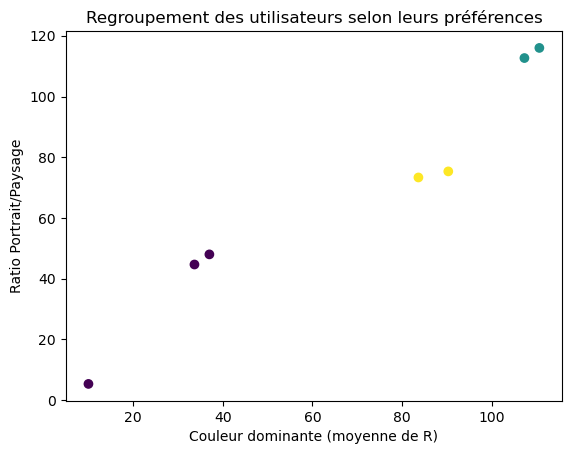

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter

# Convertir les préférences en format numérique
user_features = []
user_ids = []

for user, prefs in users_data.items():
    avg_color = np.mean(prefs["preferred_colors"], axis=0)
    orientation_counts = Counter(prefs["preferred_orientation"])
    portrait_ratio = orientation_counts.get("Portrait", 0) / sum(orientation_counts.values())

    user_features.append(list(avg_color) + [portrait_ratio])
    user_ids.append(user)

# Clustering des utilisateurs
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
clusters = kmeans.fit_predict(user_features)

# Associer les utilisateurs aux clusters
user_clusters = {user_ids[i]: clusters[i] for i in range(len(user_ids))}

# Affichage des résultats
for cluster_id in range(num_clusters):
    cluster_members = [user for user, cluster in user_clusters.items() if cluster == cluster_id]
    print(f"🟢 Cluster {cluster_id+1}: {cluster_members}")

# Visualisation des clusters
plt.scatter([f[0] for f in user_features], [f[1] for f in user_features], c=clusters, cmap='viridis')
plt.xlabel("Couleur dominante (moyenne de R)")
plt.ylabel("Ratio Portrait/Paysage")
plt.title("Regroupement des utilisateurs selon leurs préférences")
plt.show()
